1. Подгрузка библиотек
2. Подгрузка файла
3. Смотрим стручтуру файла

In [47]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import  preprocessing # предобработка
from sklearn.model_selection import train_test_split # сплитование выборки
plt.style.use('seaborn-v0_8')

# column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
insurance_data = pd.read_csv('../../data/insurance.csv')#, header=None, delimiter=r"\s+", names=column_names)
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
insurance_data.info()
display(insurance_data.isnull().sum())
print('Размер выборки',insurance_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Размер выборки (1338, 7)


* age — возраст страхователя;
* sex — пол;
* bmi — индекс массы тела (кг/м2), в идеале — от 18.5 до 24.9;
* children — количество детей, охваченных медицинской страховкой;
* smoker — является ли человек курящим;
* region — район проживания в США (северо-восток, юго-восток, северо-запад, юго-запад);
* charges (целевой признак) — индивидуальные медицинские расходы, оплачиваемые медицинской страховкой.

Наши данные содержат несколько типов признаков:

* age, bmi, children — числовые признаки;
* sex, smoker — бинарные категориальные переменные (две категории);
* region — множественные категориальные переменные (несколько категорий);
* charges — числовой целевой признак.

object = sex smoker	region

In [49]:
display(insurance_data.describe())
insurance_data.describe(include='object')

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [50]:
temp_data=insurance_data.copy()

Выбраи числовые признаки

In [51]:
tupes = temp_data.dtypes
num_features = list(tupes[(tupes != 'object')].index)
y_lable='charges'
num_features

['age', 'bmi', 'children', 'charges']

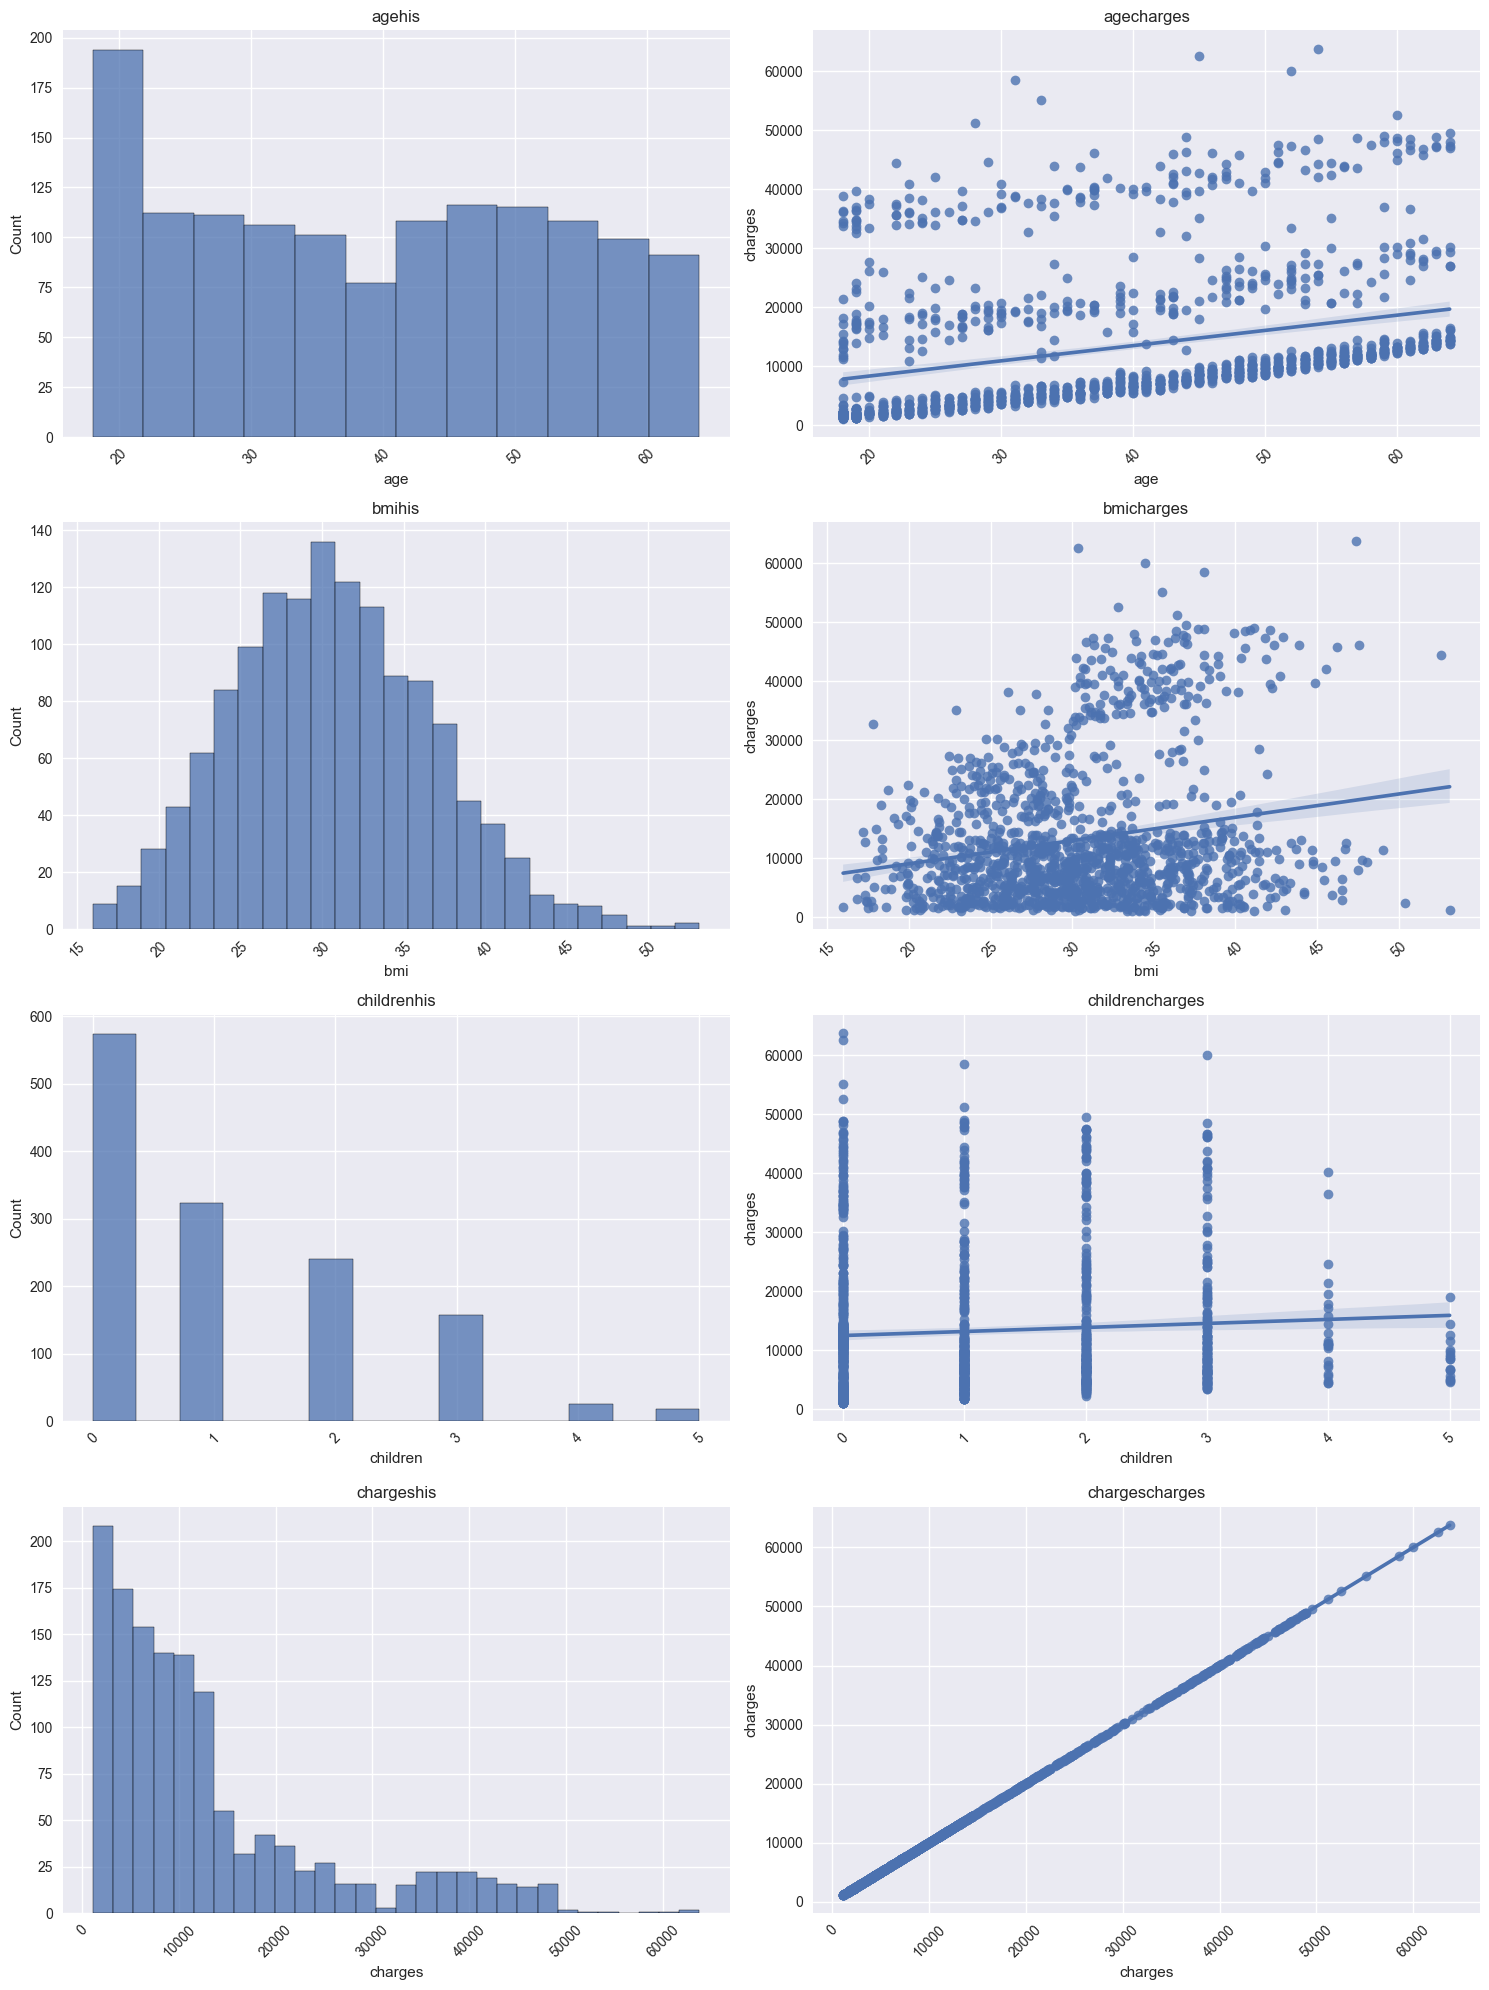

In [52]:
n=len(num_features)
fig, axes = plt.subplots(n,2,figsize=(15,20))

for i, feature in enumerate(num_features):
    histplot=sns.histplot(data=temp_data, x=feature, ax=axes[i][0])
    histplot.set_title('{}his'.format(feature))
    histplot.xaxis.set_tick_params(rotation=45)
    regplot=sns.regplot(data=temp_data,x=feature,y=y_lable,ax=axes[i][1])
    regplot.set_title('{}{}'.format(feature,y_lable))
    regplot.xaxis.set_tick_params(rotation=45)
    
plt.tight_layout();

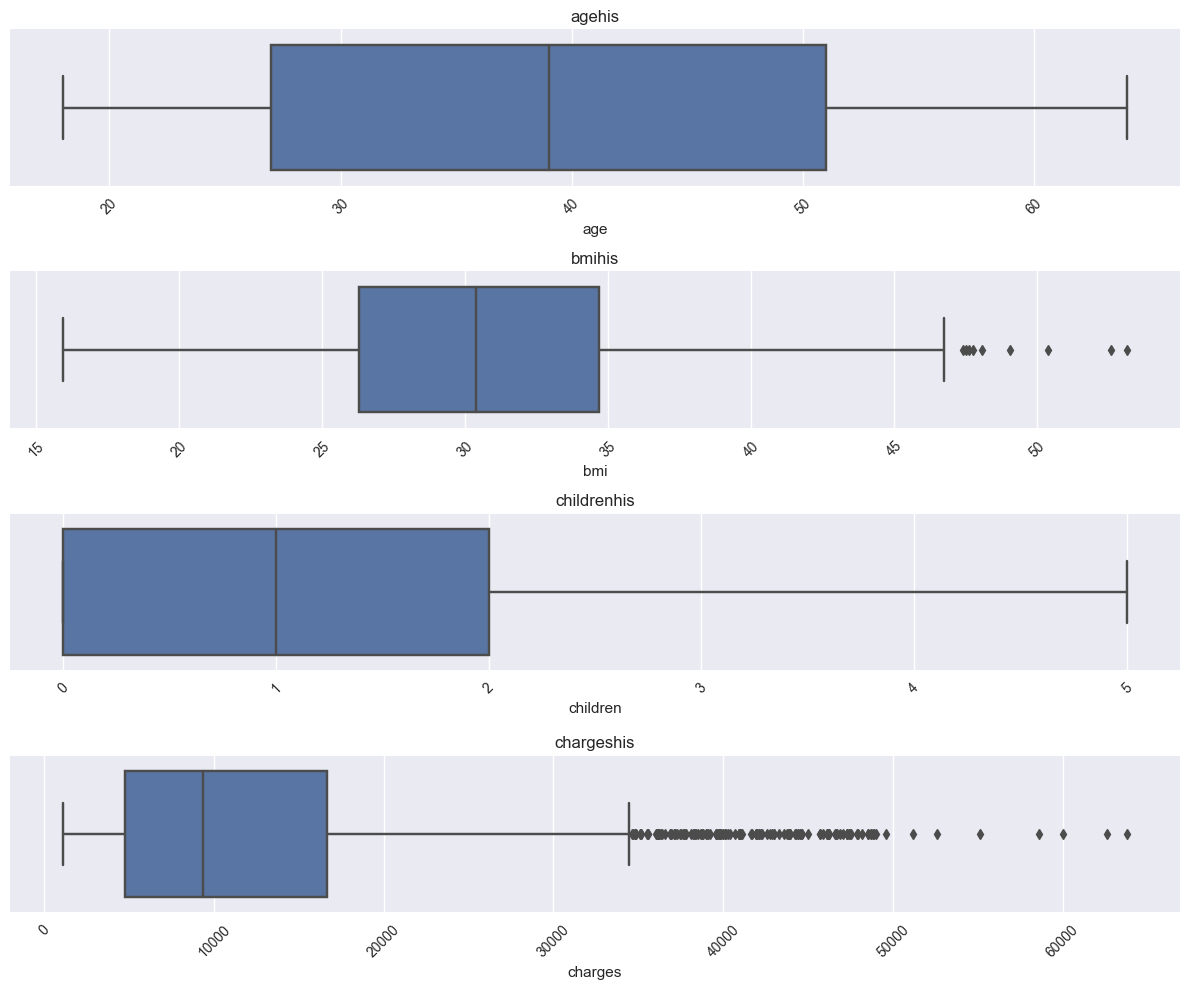

In [53]:
n=len(num_features)
fig, axes = plt.subplots(n,1, figsize=(12, 10)) #фигура+координатная плоскость
# #Ошибки модели на тренировочной выборке 

for i, feature in enumerate(num_features):
    boxplot=sns.boxplot(data=temp_data, x=feature, ax=axes[i])
    boxplot.set_title('{}his'.format(feature))
    boxplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout();


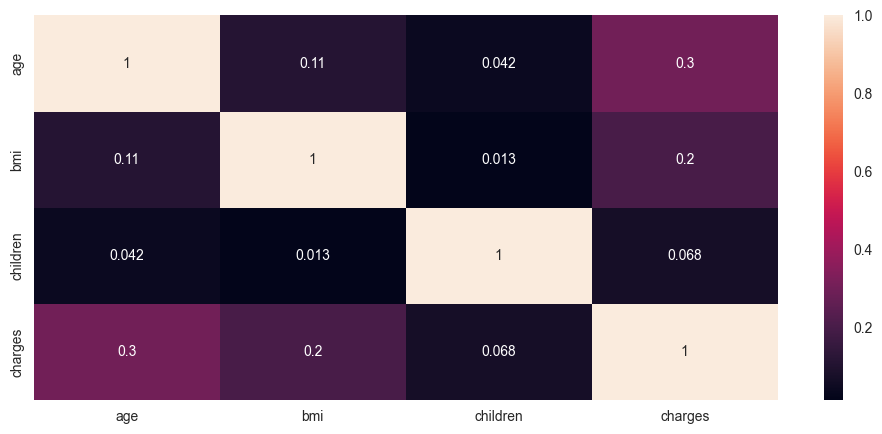

In [54]:
fig = plt.figure(figsize=(12,5))
sns.heatmap(temp_data[num_features].corr(), annot=True);

In [55]:
#кодируем бинарные категориальные признаки
temp_data['smoker'] = temp_data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
temp_data['sex'] = temp_data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
temp_data = pd.get_dummies(temp_data)
temp_data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [63]:
X=temp_data.drop(y_lable,axis=1)
y=temp_data[y_lable]

### Задание 6.1
* Прежде чем переходить к этапу моделирования, нам необходимо позаботиться о создании выборки для тестирования модели.

* Разделите набор данных на тренировочную и тестовую выборки в соотношении 80/20. Воспользуйтесь функцией train_test_split.

* В качестве значения параметра random_state укажите число 42.

### Чему равно количество наблюдений в тестовом наборе данных?

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print('Ttain shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

print('{} равно количество наблюдений в тестовом наборе данных'.format(X_test.shape[0]))

# Ttain shape: (1070, 11)
# Test shape: (268, 11)

Ttain shape: (1070, 9)
Test shape: (268, 9)
268 равно количество наблюдений в тестовом наборе данных


### Задание 6.2
Обучите модель линейной регрессии аналитическим методом (LinearRegression) на тренировочном наборе данных. Все параметры оставьте по умолчанию.

Чему равен свободный член (intercept) обученной модели? Ответ округлите до сотых.

In [74]:
features = temp_data.drop(y_lable, axis=1).columns
#Инициализируем объект класса линейная регрессия
lr = linear_model.LinearRegression()
#Обучаем модель - ищем параметры
lr.fit(X_train, y_train)
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': lr.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': lr.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df.round(2))

,Features,Coefficients
0,age,256.98
1,sex,-18.59
2,bmi,337.09
3,children,425.28
4,smoker,23651.13
5,region_northeast,459.59
6,region_northwest,88.91
7,region_southeast,-198.28
8,region_southwest,-350.21
9,INTERCEPT,-12390.80


### Задание 6.3
С помощью модели, полученной в предыдущем задании, сделайте предсказание на тренировочной и тестовой выборке. Рассчитайте следующие три метрики: , , . Не забудьте привести значение  к процентам.

Значение R2 округлите до трёх знаков после точки-разделителя, а значения MAE и MAPE — до целого числа.

Чему равны значения метрик на тренировочной и тестовой выборках?

In [80]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

In [81]:
#Инициализируем объект класса линейная регрессия
lr = linear_model.LinearRegression()
#Обучаем модель - ищем параметры
lr.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.742
Train MAE: 4208
Train MAPE: 42


Test R^2: 0.784
Test MAE: 4181
Train MAPE: 47


### Задание 6.4

Постройте диаграмму boxplot для визуализации ошибок модели линейной регрессии на тренировочной и тестовой выборках. В качестве ошибки возьмите разницу между истинным ответом и предсказанием:  y-y^(без модуля).

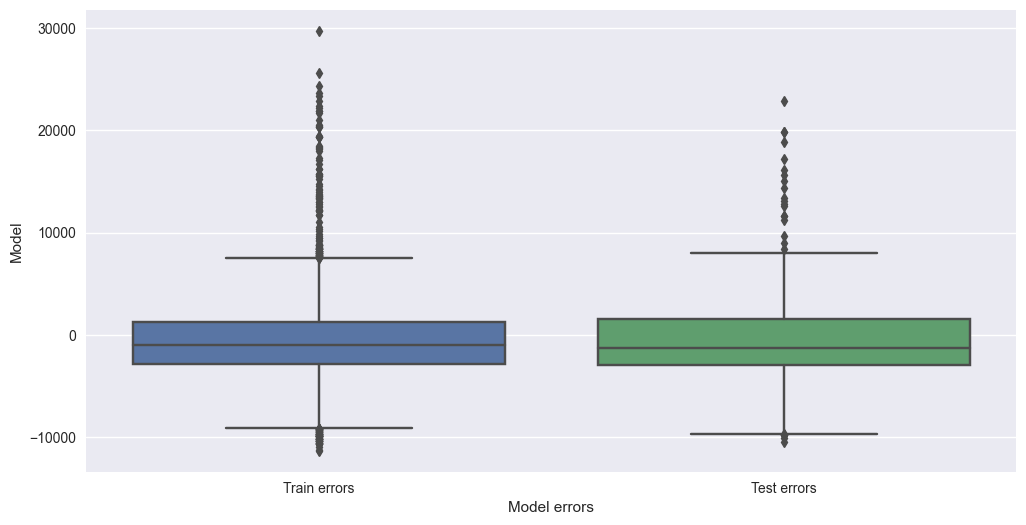

In [82]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура+координатная плоскость
#Ошибки модели на тренировочной выборке 
y_train_errors = y_train - y_train_pred
#Ошибки модели на тестовой выборке
y_test_errors = y_test - y_test_pred
#Для удобства визуализации составим DataFrame из ошибок
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors, 
     'Test errors': y_test_errors
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=predict_df, ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

### Задание 6.5
Нормализуйте тренировочную и тестовую выборки с помощью min-max-нормализации (MinMaxScaler). Расчёт параметров нормализации (fit) произведите на тренировочной выборке.

Примечание. Min-max-нормализация не искажает изначальный вид бинарных категориальных признаков, в отличие от стандартизации.

На нормализованных данных сгенерируйте полиномиальные признаки степени 2. Воспользуйтесь классом PolynomialFeatures из библиотеки sklearn. Значение параметра include_bias выставите на False.

Чему равно результирующее количество столбцов?

In [92]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()
# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(temp_data)
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=temp_data.columns)

X=df_mm.drop(y_lable,axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test)
#Выводим результирующие размерности таблиц
# print(X_train_poly.shape)
# print(X_test_poly.shape)
print('{} равно результирующее количество столбцов'.format(X_train_poly.shape[1]))

54 равно результирующее количество столбцов


### Задание 6.6
Обучите модель линейной регрессии на полиномиальных признаках.

Чему равно значение метрики R2 на тестовой выборке?

Значение R2 округлите до трёх знаков после запятой.

In [93]:
#Создаём объект класса LinearRegression
lr_model_poly = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model_poly.fit(X_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lr_model_poly.predict(X_train_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lr_model_poly.predict(X_test_poly)
 
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.842
Test R^2: 0.866


### Задание 6.7
Выведите значения коэффициентов полученной модели. Посмотрите на степени коэффициентов.

Какой вывод можно сделать?

In [94]:
print(np.round(lr_model_poly.coef_))

[-8.55249077e+14 -4.91148057e+15 -1.32793438e+13  1.72153936e+15
  3.45885380e+15 -8.52721485e+15 -9.99590584e+15 -7.82459758e+15
 -1.07225224e+16  8.37100000e+03  8.06000000e+02  9.93000000e+02
 -1.68200000e+03  1.72000000e+02  8.55249077e+14  8.55249077e+14
  8.55249077e+14  8.55249077e+14  3.86142745e+16  6.53000000e+02
 -1.23600000e+03  2.52000000e+02 -3.37027939e+16 -3.37027939e+16
 -3.37027939e+16 -3.37027939e+16 -9.71400000e+03  1.53900000e+03
  5.48380000e+04  1.32793438e+13  1.32793438e+13  1.32793438e+13
  1.32793438e+13 -2.11600000e+03 -2.21800000e+03 -1.72153936e+15
 -1.72153936e+15 -1.72153936e+15 -1.72153936e+15 -1.02742469e+15
 -2.43142912e+15 -2.43142912e+15 -2.43142912e+15 -2.43142912e+15
 -8.57832621e+15  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -7.10963522e+15  0.00000000e+00  0.00000000e+00 -9.28094348e+15
  0.00000000e+00 -6.38301868e+15]


### Задание 6.8
Постройте линейную регрессию с L1-регуляризацией (Lasso) на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию, параметр max_iter установите в значение 2000.

Чему равны метрики R2, MAE и MAPE на тестовой выборке?

Значение R2 округлите до трёх знаков после запятой, а значения MAE и MAPE до целого числа.

In [99]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(alpha=1, max_iter=2000)
#Обучаем модель
lasso_lr_poly.fit(X_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_poly)


print_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)

Train R^2: 0.842
Train MAE: 2890
Train MAPE: 29


Test R^2: 0.867
Test MAE: 2719
Train MAPE: 30


Задание 6.9
Постройте линейную регрессию с L2-регуляризацией на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию.

Чему равны метрики R2 , MAE и MAPE на тестовой выборке?

Значение R2 округлите до трёх знаков после запятой, а значения MAE и MAPE до целого числа.

In [100]:
#Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge()
#Обучаем модель
ridge_lr_poly.fit(X_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = ridge_lr_poly.predict(X_train_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = ridge_lr_poly.predict(X_test_poly)
#Рассчитываем коэффициент детерминации для двух выборок
print_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)

Train R^2: 0.839
Train MAE: 2949
Train MAPE: 30


Test R^2: 0.863
Test MAE: 2861
Train MAPE: 31
